In [135]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
scipy: 1.13.1
numpy: 1.26.4
matplotlib: 3.8.4
pandas: 2.2.2
sklearn: 1.4.2


In [151]:
#setting up packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
#loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [140]:
#refining the data
df.replace('?',-99999, inplace=True)
print(df.axes)

df.drop(['id'], axis=1, inplace=True)



[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [141]:
#dataset visualizations 
print(df.loc[10])

# shape of the dataset
print(df.shape)

clump_thickness           1
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    1
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 10, dtype: object
(699, 10)


In [142]:
#describe the dataset
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


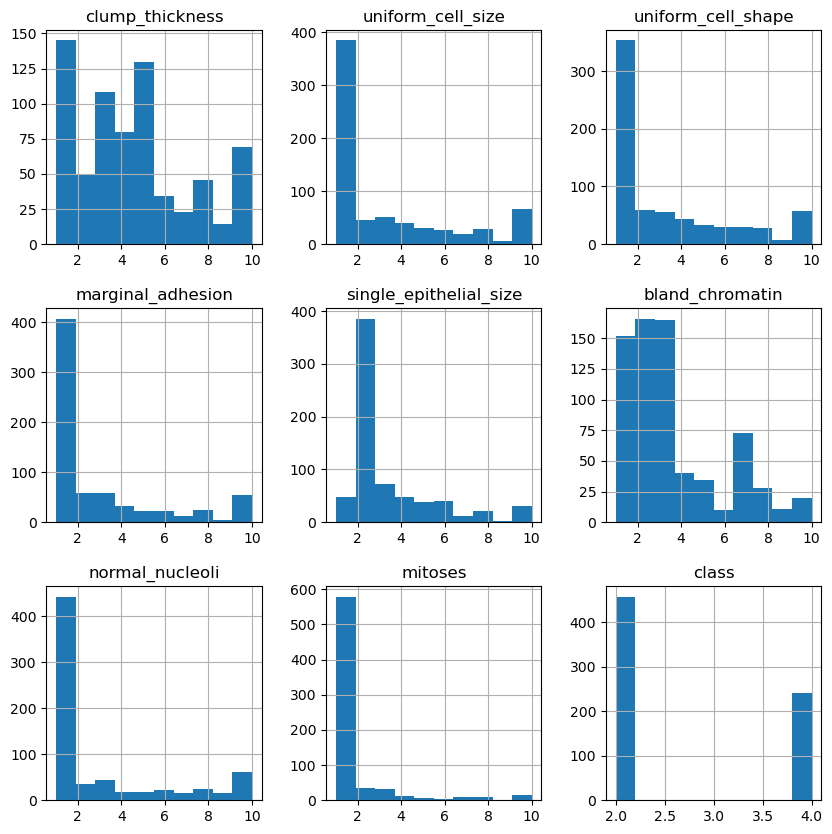

In [143]:
#visualizing data with histograms 
df.hist(figsize = (10, 10))
plt.show()

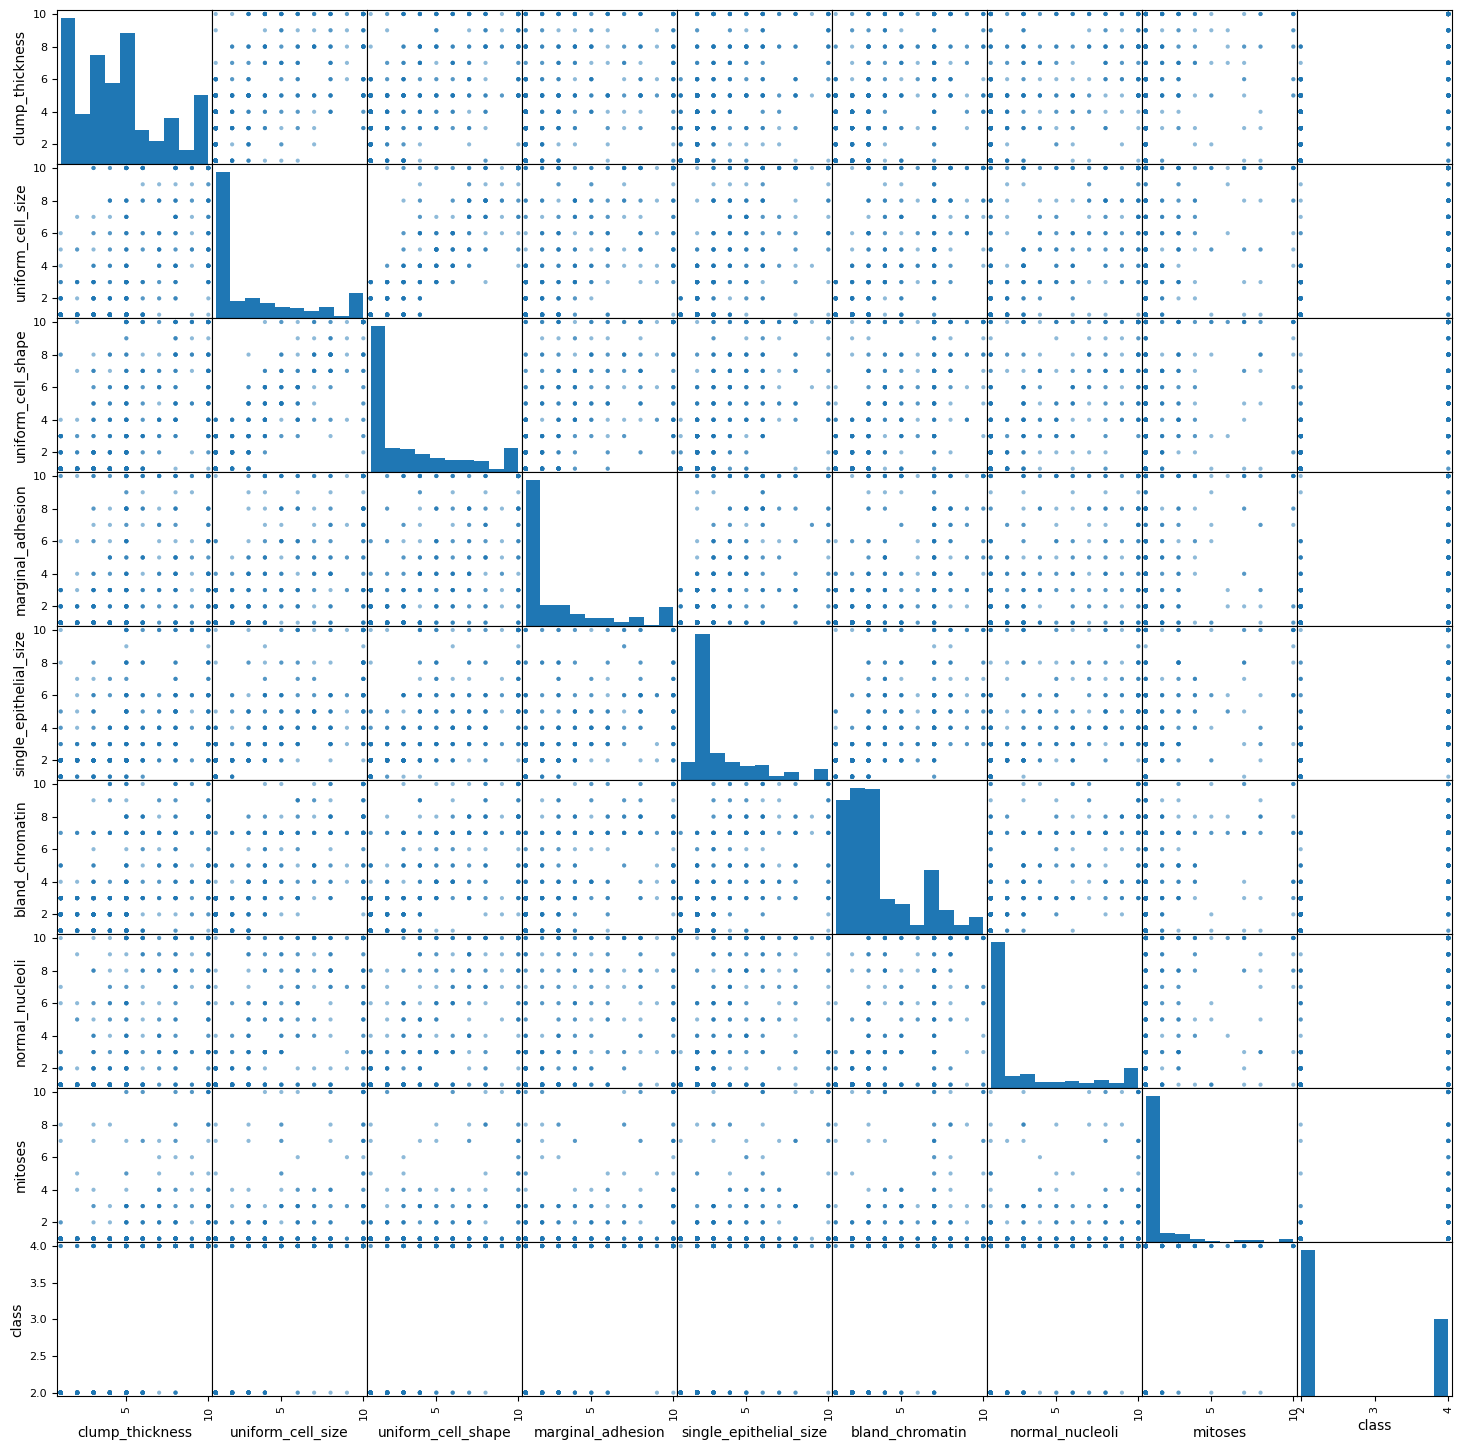

In [144]:
#creating a scatterplot matrix 
scatter_matrix(df, figsize = (18,18))
plt.show()

In [153]:
#assuming df is already defined and loaded
#creating X and Y datasets for training
X = np.array(df.drop(['class'], axis=1)) 
y = np.array(df['class'])

#spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


In [154]:
#testing Options
seed = 8
scoring = 'accuracy'

In [155]:
#defining models to train 
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})"
    print(msg)
 

KNN: 0.969643 (0.021204)
SVM: 0.654675 (0.047086)


In [156]:
# Make predictions on validation dataset

from sklearn.metrics import classification_report, accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, predictions))
    # Use zero_division parameter to handle cases where precision or recall is undefined
    print(classification_report(y_test, predictions, zero_division=0))

    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

KNN
Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.95      0.97        92
           4       0.91      1.00      0.95        48

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

SVM
Accuracy: 0.6571428571428571
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        92
           4       0.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.43      0.66      0.52       140



In [157]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.6571428571428571
[2]
